In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('bmh')

In [2]:
listings = pd.read_csv("listings.csv")
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,6,https://www.airbnb.com/rooms/6,20181115100559,2018-11-15,Large Craftsmen w/ yard ~ Perfect for families,Our Beautiful Craftsmen house has all the mode...,"We are located in the heart of North Park, the...",Our Beautiful Craftsmen house has all the mode...,none,"We have the best Neighborhood in San Diego, in...",...,f,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",t,f,strict_14_with_grace_period,f,f,1,1.18
1,5570,https://www.airbnb.com/rooms/5570,20181115100559,2018-11-15,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,This charming two bedroom beachfront condomini...,Missionbeachretreat. Great Ocean Front Condo...,none,While some may compare San Diego’s Mission Bea...,...,f,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,f,f,2,NaN
2,8095,https://www.airbnb.com/rooms/8095,20181115100559,2018-11-15,Sunset Cliffs Studio,NaN,"Newly renovated, detached studio with private ...","Newly renovated, detached studio with private ...",none,"proximity to ocean , walkability to ocean beac...",...,f,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,f,f,1,1.56
3,39516,https://www.airbnb.com/rooms/39516,20181115100559,2018-11-15,Art Studio Retreat/Rustic Cabin,We love having explorers from all over the wor...,"Nestled in South/North Park, a gentrified neig...",We love having explorers from all over the wor...,none,"We love our eclectic neighborhood, with a smal...",...,f,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,t,f,1,3.33
4,45429,https://www.airbnb.com/rooms/45429,20181115100559,2018-11-15,OB cottage SD--view on waterway,This charming independent cottage nestles besi...,"This 1 bd ~500 sq ft. ground level, independe...",This charming independent cottage nestles besi...,none,NaN,...,f,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,moderate,f,f,1,0.06


In [3]:
listings.shape

(11922, 96)

#### Non missing values percentage in each column

In [4]:
listings.count()/len(listings)

id                                  1.000000
listing_url                         1.000000
scrape_id                           1.000000
last_scraped                        1.000000
name                                0.999832
summary                             0.965358
space                               0.734944
description                         0.987167
experiences_offered                 1.000000
neighborhood_overview               0.636890
notes                               0.525918
transit                             0.593860
access                              0.633786
interaction                         0.614075
house_rules                         0.709612
thumbnail_url                       0.000000
medium_url                          0.000000
picture_url                         1.000000
xl_picture_url                      0.000000
host_id                             1.000000
host_url                            1.000000
host_name                           0.999497
host_since

#### Count of missing values in each column

In [5]:
#listings.isnull().sum()

#### Dropped columns with more than 50% of missing values

In [6]:
def missing_values(df, percentage):

    columns = df.columns
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})

    missing_drop = list(missing_value_df[missing_value_df.percent_missing>percentage].column_name)
    print("Dropped columns:", missing_drop)
    df = df.drop(missing_drop, axis=1)
    return df

In [7]:
cleaned = missing_values(listings, 50)

Dropped columns: ['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price', 'monthly_price', 'license']


In [8]:
cleaned.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,6,https://www.airbnb.com/rooms/6,20181115100559,2018-11-15,Large Craftsmen w/ yard ~ Perfect for families,Our Beautiful Craftsmen house has all the mode...,"We are located in the heart of North Park, the...",Our Beautiful Craftsmen house has all the mode...,none,"We have the best Neighborhood in San Diego, in...",...,10.0,f,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",t,f,strict_14_with_grace_period,f,f,1,1.18
1,5570,https://www.airbnb.com/rooms/5570,20181115100559,2018-11-15,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,This charming two bedroom beachfront condomini...,Missionbeachretreat. Great Ocean Front Condo...,none,While some may compare San Diego’s Mission Bea...,...,NaN,f,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,f,f,2,NaN
2,8095,https://www.airbnb.com/rooms/8095,20181115100559,2018-11-15,Sunset Cliffs Studio,NaN,"Newly renovated, detached studio with private ...","Newly renovated, detached studio with private ...",none,"proximity to ocean , walkability to ocean beac...",...,9.0,f,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,f,f,1,1.56
3,39516,https://www.airbnb.com/rooms/39516,20181115100559,2018-11-15,Art Studio Retreat/Rustic Cabin,We love having explorers from all over the wor...,"Nestled in South/North Park, a gentrified neig...",We love having explorers from all over the wor...,none,"We love our eclectic neighborhood, with a smal...",...,10.0,f,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,t,f,1,3.33
4,45429,https://www.airbnb.com/rooms/45429,20181115100559,2018-11-15,OB cottage SD--view on waterway,This charming independent cottage nestles besi...,"This 1 bd ~500 sq ft. ground level, independe...",This charming independent cottage nestles besi...,none,NaN,...,9.0,f,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,moderate,f,f,1,0.06


In [9]:
df_clean = cleaned.drop(['id', 'scrape_id', 'host_id', 'interaction', 'picture_url', 'host_url', 'host_thumbnail_url','host_picture_url', 'access', 'host_name', 'jurisdiction_names', 'host_about', 'house_rules', 'listing_url', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit'], axis = 1)
df_clean.head()

,last_scraped,experiences_offered,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2018-11-15,none,2008-03-03,"San Diego, California, United States",within an hour,100%,t,North Park,1.0,1.0,...,10.0,10.0,f,t,f,strict_14_with_grace_period,f,f,1,1.18
1,2018-11-15,none,2009-02-23,"San Diego, California, United States",within a few hours,100%,f,Mission Beach,3.0,3.0,...,NaN,NaN,f,f,f,strict_14_with_grace_period,f,f,2,NaN
2,2018-11-15,none,2008-04-15,"San Diego, California, United States",NaN,NaN,f,Point Loma Heights,1.0,1.0,...,9.0,9.0,f,f,f,strict_14_with_grace_period,f,f,1,1.56
3,2018-11-15,none,2010-07-17,"San Diego, California, United States",within an hour,100%,t,North Park,1.0,1.0,...,10.0,10.0,f,f,f,strict_14_with_grace_period,t,f,1,3.33
4,2018-11-15,none,2010-08-10,"San Diego, California, United States",NaN,NaN,f,Point Loma Heights,1.0,1.0,...,9.0,9.0,f,f,f,moderate,f,f,1,0.06


In [10]:
df_filtered = df_clean.loc[lambda x: x['host_location'] == "San Diego, California, United States"]
df_filtered.head()

,last_scraped,experiences_offered,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2018-11-15,none,2008-03-03,"San Diego, California, United States",within an hour,100%,t,North Park,1.0,1.0,...,10.0,10.0,f,t,f,strict_14_with_grace_period,f,f,1,1.18
1,2018-11-15,none,2009-02-23,"San Diego, California, United States",within a few hours,100%,f,Mission Beach,3.0,3.0,...,NaN,NaN,f,f,f,strict_14_with_grace_period,f,f,2,NaN
2,2018-11-15,none,2008-04-15,"San Diego, California, United States",NaN,NaN,f,Point Loma Heights,1.0,1.0,...,9.0,9.0,f,f,f,strict_14_with_grace_period,f,f,1,1.56
3,2018-11-15,none,2010-07-17,"San Diego, California, United States",within an hour,100%,t,North Park,1.0,1.0,...,10.0,10.0,f,f,f,strict_14_with_grace_period,t,f,1,3.33
4,2018-11-15,none,2010-08-10,"San Diego, California, United States",NaN,NaN,f,Point Loma Heights,1.0,1.0,...,9.0,9.0,f,f,f,moderate,f,f,1,0.06


### <b> Observation: </b> 97% hotels in San Diego doesnt require profile picture from customers.

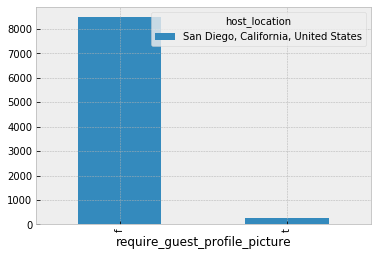

In [11]:
profile_pic = df_filtered.groupby(['require_guest_profile_picture', 'host_location']).size().unstack()
profile_pic.plot(kind = 'bar', stacked = True)

In [12]:
df_filtered['require_guest_profile_picture'].value_counts()

f    8477
t     257
Name: require_guest_profile_picture, dtype: int64

### <b> Observation: </b> 96% hotels in San Diego doesnt require phone number verification from customers.

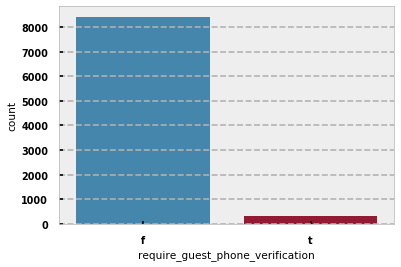

In [89]:
sns.countplot(df_filtered['require_guest_phone_verification'])

In [90]:
df_filtered['require_guest_phone_verification'].value_counts()

f    8433
t     301
Name: require_guest_phone_verification, dtype: int64

### <b> Observation: </b> Approximately 40% hotels at San Diego have a cancellation policy of 14 days with grace period.

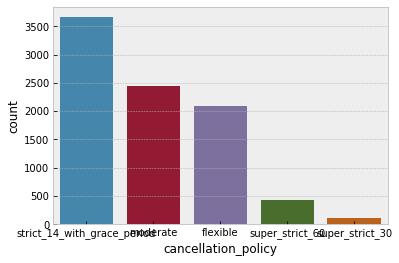

In [84]:
sns.countplot(df_filtered['cancellation_policy'])

In [83]:
df_filtered['cancellation_policy'].value_counts()

strict_14_with_grace_period    3659
moderate                       2439
flexible                       2098
super_strict_60                 430
super_strict_30                 108
Name: cancellation_policy, dtype: int64

### Feature to feature relationship

Trying to plot all the numerical features in a seaborn pairplot will take us too much time and will be hard to interpret. We can try to see if some variables are linked between each other and then explain their relation with common sense.

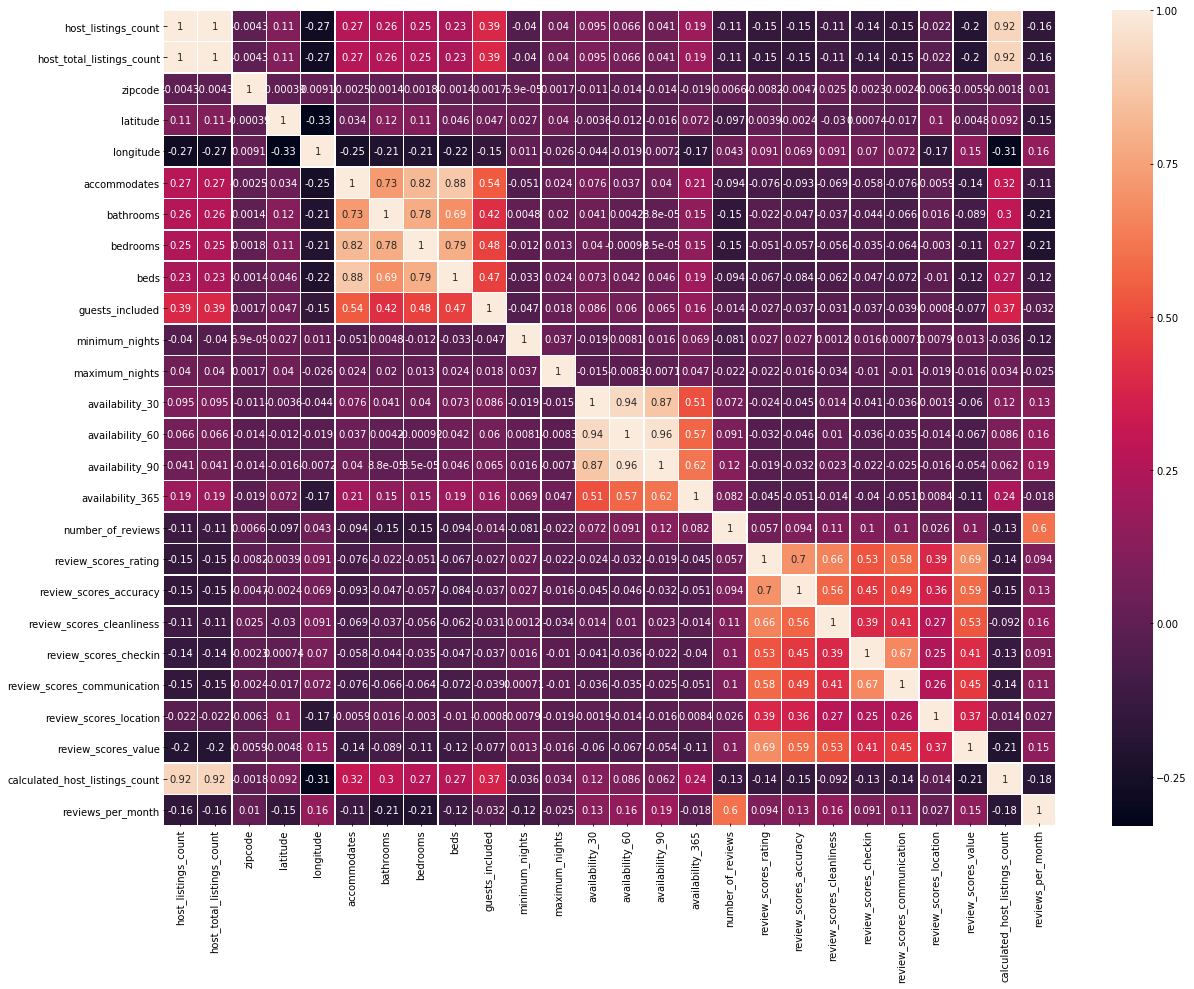

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(df_filtered.corr(), annot=True, linewidths=.5,)
plt.show()

### <b> Observation: </b> 
1. Variables like accommodations, bathrooms, bedrooms, beds and guests included are highly correlated.<br/>
2. Its a known thing that people prefer to select rooms or accomodations based on these variables. <br/>
3. And the review of cleanliness, checking, communication, location are highly correlated to each other. Though its not a surprise, but if we maintain the above mentioned things, people are high likely to give good reviews. 

In [14]:
list(set(df_filtered.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

#### Object type columns

In [15]:
df_object = df_filtered.select_dtypes(include = ['O'])
df_object.head()

,last_scraped,experiences_offered,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,...,has_availability,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,2018-11-15,none,2008-03-03,"San Diego, California, United States",within an hour,100%,t,North Park,"['email', 'phone', 'facebook', 'reviews', 'off...",t,...,t,2018-11-15,2008-06-22,2018-10-07,f,t,f,strict_14_with_grace_period,f,f
1,2018-11-15,none,2009-02-23,"San Diego, California, United States",within a few hours,100%,f,Mission Beach,"['email', 'phone', 'kba']",t,...,t,2018-11-15,NaN,NaN,f,f,f,strict_14_with_grace_period,f,f
2,2018-11-15,none,2008-04-15,"San Diego, California, United States",NaN,NaN,f,Point Loma Heights,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,...,t,2018-11-15,2009-07-04,2015-11-02,f,f,f,strict_14_with_grace_period,f,f
3,2018-11-15,none,2010-07-17,"San Diego, California, United States",within an hour,100%,t,North Park,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,...,t,2018-11-15,2010-07-20,2018-11-07,f,f,f,strict_14_with_grace_period,t,f
4,2018-11-15,none,2010-08-10,"San Diego, California, United States",NaN,NaN,f,Point Loma Heights,"['email', 'phone', 'reviews']",t,...,t,2018-11-15,2011-01-06,2014-07-28,f,f,f,moderate,f,f


#### For this part lets look at the distribution of all of the features by ploting them

To do so lets first list all the types of our data from our dataset and take only the numerical ones:

#### Quantitative columns

In [16]:
df_num = df_filtered.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,host_listings_count,host_total_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,1.0,1.0,92104.0,32.753993,-117.129705,6,2.0,3.0,4.0,4,...,149,96.0,10.0,9.0,10.0,10.0,10.0,10.0,1,1.18
1,3.0,3.0,92109.0,32.784304,-117.252578,6,1.0,2.0,4.0,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
2,1.0,1.0,92107.0,32.735170,-117.243793,2,1.0,0.0,1.0,2,...,178,93.0,10.0,10.0,10.0,9.0,9.0,9.0,1,1.56
3,1.0,1.0,92104.0,32.731884,-117.119180,2,1.0,1.0,1.0,1,...,338,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,3.33
4,1.0,1.0,92107.0,32.748768,-117.229371,2,1.0,1.0,1.0,2,...,6,85.0,9.0,9.0,10.0,10.0,9.0,9.0,1,0.06


#### Now lets plot them all

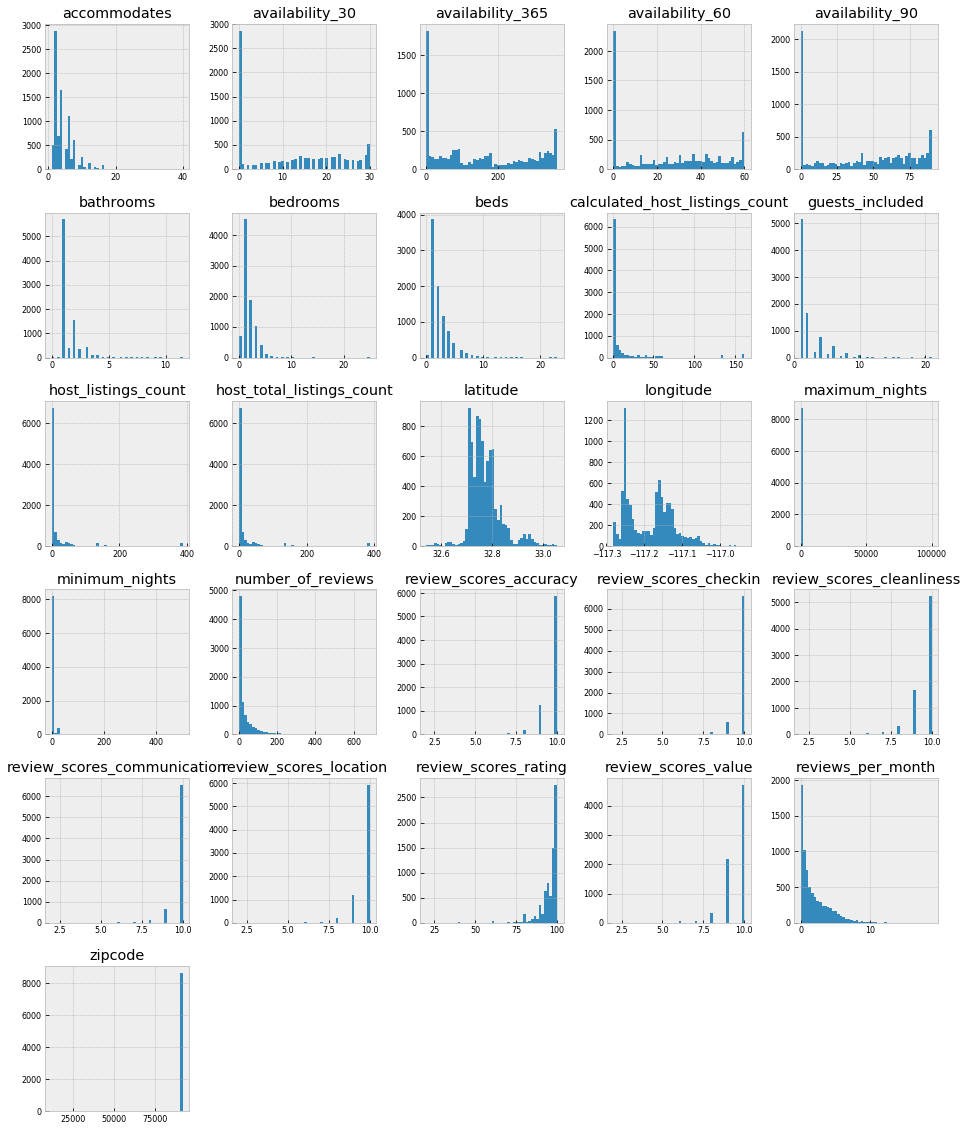

In [17]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); #

<b> Observations:</b> All the features are skewed towards right or left. Lets see if we can find any clues later... 

#### Now we'll try to find which features are strongly correlated with accomdates.

In [18]:
df_num_corr = df_num.corr()['accommodates'][:-1] 
features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with accommodates:\n{}".format(len(features_list), features_list))

There is 5 strongly correlated values with accommodates:
accommodates       1.000000
beds               0.876631
bedrooms           0.823794
bathrooms          0.725986
guests_included    0.542141
Name: accommodates, dtype: float64


Perfect, we now have a list of strongly correlated values but this list is incomplete as we know that correlation is affected by outliers. So we could proceed as follow:

Plot the numerical features and see which ones have very few or explainable outliers
Remove the outliers from these features and see which one can have a good correlation without their outliers
Btw, correlation by itself does not always explain the relationship between data so ploting them could even lead us to new insights and in the same manner, check that our correlated values have a linear relationship to the accommodates.


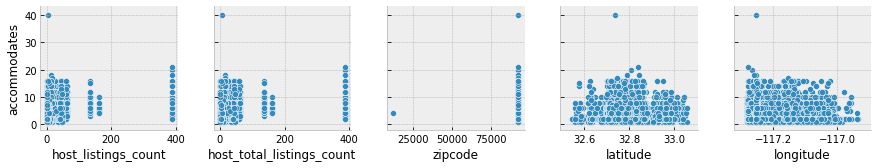

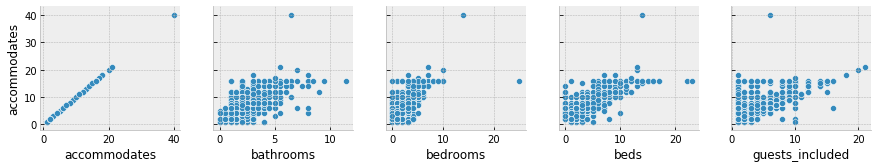

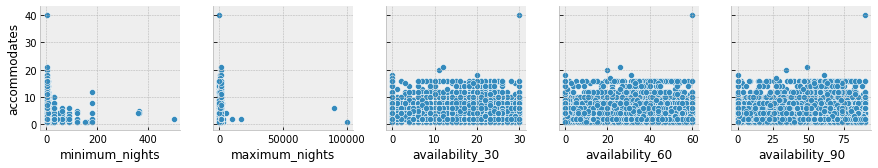

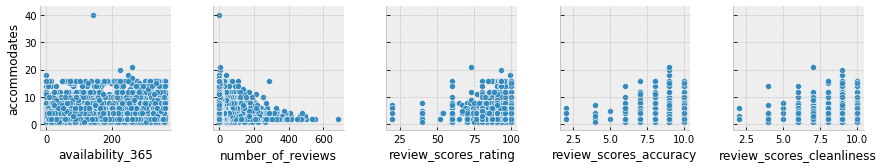

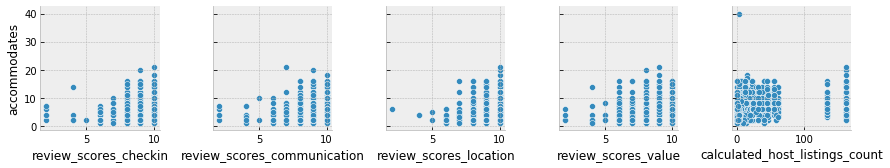

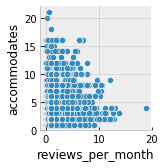

In [19]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['accommodates'])

In [23]:
calendar = pd.read_csv("calendar.csv")
calendar.head()

,listing_id,date,available,price
0,635756,2019-11-14,t,$67.00
1,292285,2019-11-14,f,NaN
2,292285,2019-11-13,f,NaN
3,292285,2019-11-12,f,NaN
4,292285,2019-11-11,f,NaN


In [28]:
calendar['available'].value_counts()

f    2533587
t    1817943
Name: available, dtype: int64

In [95]:
### removing $ and , symbols from price column
calendar['price'] = calendar['price'].str.replace('\$','')
calendar['price'] = calendar['price'].str.replace('\,','')

In [24]:
calendar_new = calendar.dropna()
calendar_new['price'] = calendar_new['price'].str.replace('\$','')
calendar_new['price'] = calendar_new['price'].str.replace('\,','')

C:\Users\Aaum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Aaum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### <b> Observation: </b> Irrespective of price, rooms are always available

Text(0.5,1.05,'price vs availability')

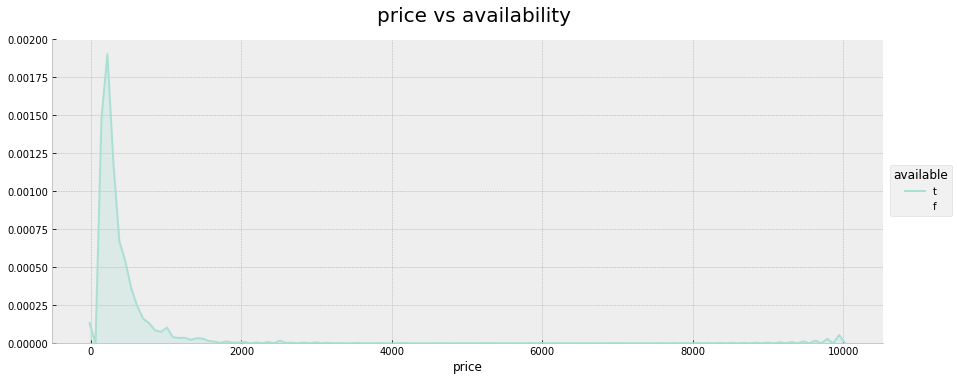

In [30]:
price_dist = sns.FacetGrid(calendar, hue = 'available', aspect = 2.5, size = 5, palette = 'BuGn')
price_dist.map(sns.kdeplot, 'price', shade = True)
price_dist.add_legend()
plt.suptitle('price vs availability', fontsize = 20, y = 1.05)

In [71]:
reviews = pd.read_csv("reviews.csv")
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6,8,2008-06-22,415,Terrence,Sara is an awesome hostess. She was very cons...
1,6,4383,2009-06-22,3762,Christine,My stay at “Craftsmen” was wonderful! Sara wa...
2,6,1722383,2012-07-16,1864778,Hieu,This was my first time using Airbnb and Sara m...
3,6,5595071,2013-07-07,117966,Daryna,Sara was a very pleasant host! Reservation was...
4,6,5631156,2013-07-08,6563815,Mathew,Sara was such an amazing hostess! My girlfrien...


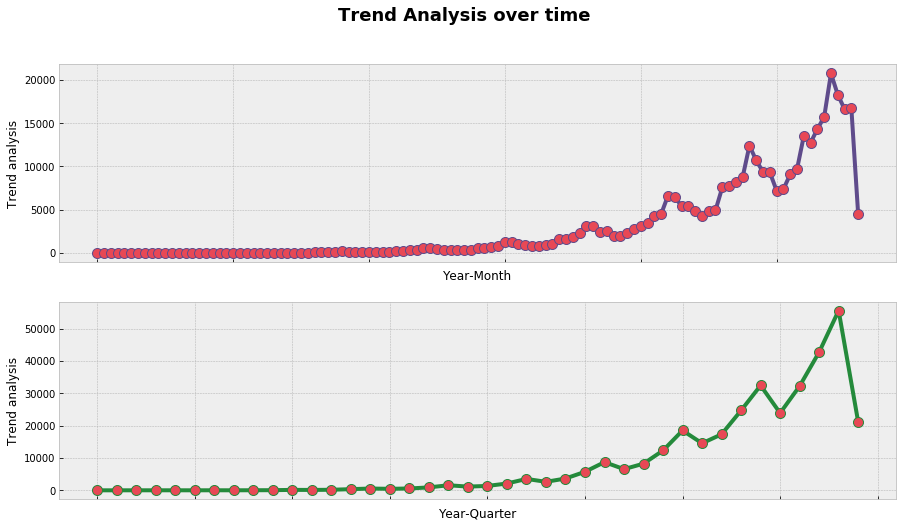

In [79]:
reviews['date'] = pd.to_datetime(reviews['date'])

fig = plt.figure(figsize=(15, 8))
fig.suptitle('Trend Analysis over time', fontsize=18, fontweight='bold')
ax = fig.add_subplot(211)
ts_month_count = reviews.groupby([reviews.date.dt.year.rename('year'), reviews.date.dt.month.rename('month')]).size()
ts_month_count.plot(linewidth=4, color='#5F4B8B',marker="o", markersize=10, markerfacecolor='#E84855')
plt.ylabel('Trend analysis')
plt.xlabel('Year-Month');


ax = fig.add_subplot(212)
ts_quarter_count = reviews.groupby([reviews.date.dt.year.rename('year'), reviews.date.dt.quarter.rename('quarter')]).size()#['AmountInUSD']
ts_quarter_count.plot(linewidth=4, color='#248A3B',marker="o", markersize=10, markerfacecolor='#E84855')
plt.ylabel('Trend analysis')
plt.xlabel('Year-Quarter');
# plt.

### <b> Observation: </b> 

There is an increasing trend over time which means vacation holidays becomes part of their life. Also high rise in internet usage made people to book accommodations online easily which paved way to many travel consultants like makemytrip, pickyourtrail, yatra.com, Thomascook etc..  

In [31]:
listings_brief = pd.read_csv("listings_brief.csv")
listings_brief.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6,Large Craftsmen w/ yard ~ Perfect for families,29,Sara,NaN,North Hills,32.753993,-117.129705,Entire home/apt,295,2,149,2018-10-07,1.18,1,20
1,5570,Ocean front condo on the sand,8435,Jef Karchin'S MISSIONBEACHRETREAT,NaN,Mission Bay,32.784304,-117.252578,Entire home/apt,2050,3,0,NaN,NaN,2,328
2,8095,Sunset Cliffs Studio,270,Marin,NaN,Ocean Beach,32.735170,-117.243793,Entire home/apt,84,2,178,2015-11-02,1.56,1,0
3,39516,Art Studio Retreat/Rustic Cabin,169649,Chris And Jean,NaN,North Hills,32.731884,-117.119180,Entire home/apt,69,3,338,2018-11-07,3.33,1,273
4,45429,OB cottage SD--view on waterway,197919,Melissa,NaN,Loma Portal,32.748768,-117.229371,Entire home/apt,160,2,6,2014-07-28,0.06,1,363


### <b> Observations: </b> People in San Diego mostly preferred Entire home\apt room types. Very less people hired shared room.

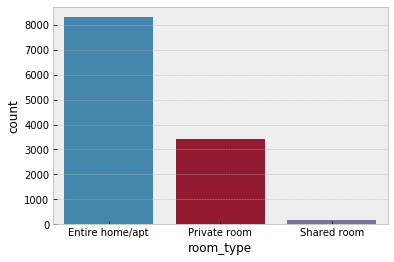

In [33]:
sns.countplot(listings_brief['room_type'])

### <b> Observation: </b> Price distribution with room_types <br/>

1. Shared room types are very cheaper than entire room\apt and private room. <br/>
2. Share room type prices are under 250 dollars <br/>
3. Entire home/apt costs approximately between 300 to 10000 dollars  - costlier room type <br/>
4. private room costs vary between 300 to 2500 dollars approximately

In [104]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(listings_brief[listings_brief['room_type'] == 'Entire home/apt'][feature].dropna(), color= 'navy', label= 'room_type: Entire home/apt')
    ax1 = sns.kdeplot(listings_brief[listings_brief['room_type'] == 'Private room'][feature].dropna(), color= 'orange', label= 'room_type: private_room')
    ax2 = sns.kdeplot(listings_brief[listings_brief['room_type'] == 'Shared room'][feature].dropna(), color= 'red', label= 'room_type: shared_room')

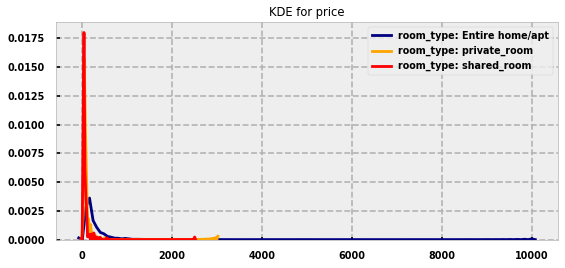

In [105]:
kdeplot('price')

Text(0.5,1.05,'price vs room_type')

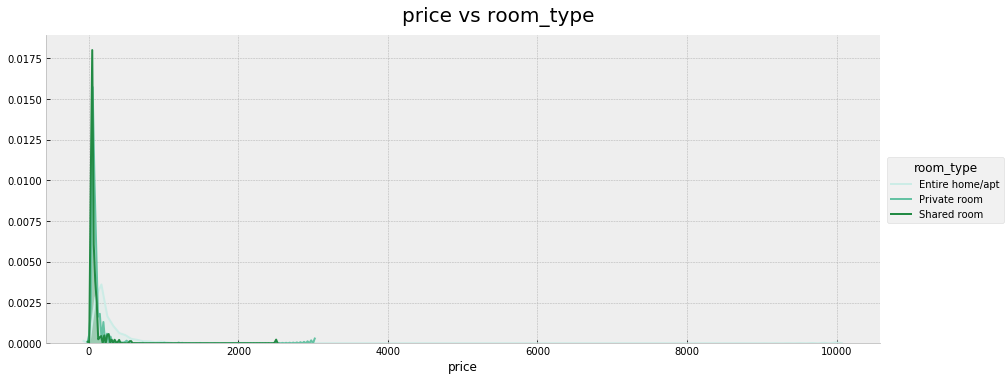

In [43]:
price_dist = sns.FacetGrid(listings_brief, hue = 'room_type', aspect = 2.5, size = 5, palette = 'BuGn')
price_dist.map(sns.kdeplot, 'price', shade = True)
price_dist.add_legend()
plt.suptitle('price vs room_type', fontsize = 20, y = 1.05)

In [111]:
# Extracting latitude and longitude and area field to plot on Map

data = pd.DataFrame(listings_brief, columns = ['latitude','longitude','neighbourhood']) #[:50]  <-this kind of slice is useful for developing a map
data.area = data.neighbourhood.fillna('none')

# remove those rows where latitude & longitude is null
data = data.drop(data[data.latitude.isnull()].index)
data = data.drop(data[data.longitude.isnull()].index)

C:\Users\Aaum\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [120]:
import gmplot 

In [137]:
latitude_list = listings_brief['latitude']
longitude_list = listings_brief['longitude']

In [138]:
gmap = gmplot.GoogleMapPlotter(0, 0, 2)

In [139]:
# plot heatmap
gmap.heatmap(latitude_list, longitude_list)
gmap.scatter(latitude_list, longitude_list, c='r', marker=True)

In [140]:
gmap.apikey = "APIKEY"

In [142]:
gmap.draw(r"C:\Users\Aaum\Desktop\CreditMantri\country_heatmap.html")

<img src="sandiego.png">